In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/capsnet-lstm-dataset/malicious.csv
/kaggle/input/capsnet-lstm-dataset/testing_queries.csv
/kaggle/input/capsnet-lstm-dataset/test_data_correct.csv
/kaggle/input/capsnet-lstm-dataset/train_data.csv
/kaggle/input/capsnet-lstm-dataset/test_data.csv
/kaggle/input/capsnet-lstm-dataset/normal.csv
/kaggle/input/capsnet-lstm-dataset/training_queries.csv
/kaggle/input/rnp-miner-dataset/RNP-Miner_3.py
/kaggle/input/rnp-miner-dataset/Test Data.csv
/kaggle/input/rnp-miner-dataset/correct_predictions_per (1).csv
/kaggle/input/rnp-miner-dataset/malicious.csv
/kaggle/input/rnp-miner-dataset/Training Data.csv
/kaggle/input/rnp-miner-dataset/correct_predictions_per (3).csv
/kaggle/input/rnp-miner-dataset/normal_sdb1_format.txt
/kaggle/input/rnp-miner-dataset/testing_queries.csv
/kaggle/input/rnp-miner-dataset/normal.csv
/kaggle/input/rnp-miner-dataset/training_queries.csv
/kaggle/input/rnp-miner-dataset/normal_with_matrix.csv
/kaggle/input/temp-data/testing_queries_for_15k.csv
/kaggle/inp

In [22]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load dataset (Replace 'your_file.csv' with actual file name)
# df = pd.read_csv('/kaggle/input/capsnet-lstm-dataset/train_data.csv')

# # Step 1: Exclude first 1257 entries
# df = df.iloc[1257:].reset_index(drop=True)

# # Step 2: Shuffle the dataset
# df = df.sample(frac=1, random_state=None).reset_index(drop=True)

# # Step 3: Split into 80% train and 20% test
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=None, shuffle=False)  # Already shuffled

# # Step 4: Save the split datasets
# train_df.to_csv('/kaggle/working/train_data_shuffled.csv', index=False)
# test_df.to_csv('/kaggle/working/test_data_shuffled.csv', index=False)

# print("Files saved successfully!")

In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import ast  # Import the ast module

# 1. Data Preprocessing

# Load data from CSV
data = pd.read_csv('/kaggle/input/temp-data/training_queries_for_22.5k.csv')

# Define all possible elements (vocabulary)
vocabulary = [f"{prefix}{num:02}" for prefix in ['R', 'W'] for num in range(50)]
num_elements = len(vocabulary)

# Create dictionaries for mapping
word_to_index = {word: i for i, word in enumerate(vocabulary)}
index_to_word = {i: word for i, word in enumerate(vocabulary)}

# Correctly encode the sequences (handling string representation of lists)
def encode_sequence(sequence_str):
    try:
        sequence_list = ast.literal_eval(sequence_str)  # Safely parse the string as a list
        return [word_to_index[element] for element in sequence_list]
    except (SyntaxError, ValueError):  # Handle potential errors in parsing
        return []  # Or some other default value/handling for invalid sequences

data['encoded_sequence'] = data['query'].apply(encode_sequence)

# Remove rows with empty encoded sequences (if any)
data = data[data['encoded_sequence'].apply(len) > 0]

# Find the maximum sequence length (after removing potentially invalid sequences)
max_length = max(data['encoded_sequence'].apply(len))

# Pad the sequences
padded_sequences = pad_sequences(data['encoded_sequence'], maxlen=max_length, padding='post', value=0)

# One-hot encode the sequences
one_hot_sequences = np.zeros((len(padded_sequences), max_length, num_elements))
for i, sequence in enumerate(padded_sequences):
    for j, element in enumerate(sequence):
        if element != 0:  # Ignore padding
            one_hot_sequences[i, j, element] = 1

# Prepare the labels (assuming roles are integers 0-4)
roles = data['role'].values
num_roles = 5  # Get the number of unique roles
one_hot_labels = to_categorical(roles, num_classes=num_roles)

# Example usage (print shapes to verify)
print("Padded Sequences shape:", padded_sequences.shape)
print("One-Hot Sequences shape:", one_hot_sequences.shape)
print("One-Hot Labels shape:", one_hot_labels.shape)
from sklearn.utils import shuffle
X_train, y_train = shuffle(one_hot_sequences, one_hot_labels, random_state=None)
# print(X_train.shape)

Padded Sequences shape: (18000, 14)
One-Hot Sequences shape: (18000, 14, 100)
One-Hot Labels shape: (18000, 5)


In [24]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# import pandas as pd

# # 3. Load and Preprocess the NEW test data (important: same preprocessing as training)
# new_data_df = pd.read_csv("/kaggle/working/train_data_shuffled.csv")  # Replace with your file name

# all_elements = [f'R{i:02d}' for i in range(50)] + [f'W{i:02d}' for i in range(50)]
# element_to_index = {element: idx for idx, element in enumerate(all_elements)}

# def preprocess_sequence(sequence_string):
#     tokens = sequence_string.strip("[]").split(",")  # Remove brackets and split
#     tokens = [token.strip('"') for token in tokens] # Remove quotes
#     index_sequence = [element_to_index.get(element) for element in tokens if element in element_to_index] # Handle unknown tokens
#     return index_sequence

# new_sequences = new_data_df['query'].tolist()
# new_index_sequences = [preprocess_sequence(seq) for seq in new_sequences]

# max_len = 14  # Make sure this is the same as your training data's max_len
# new_padded_sequences = np.array([seq + [-1] * (max_len - len(seq)) for seq in new_index_sequences])

# # One-hot encode (without padding token in the matrix)
# one_hot_matrix = np.eye(len(all_elements))  # No +1 for padding!
# new_one_hot_sequences = np.array([[one_hot_matrix[idx] if idx != -1 and idx is not None else np.zeros(len(all_elements)) for idx in seq] for seq in new_padded_sequences])

# new_roles = new_data_df['role'].tolist()
# num_classes = len(np.unique(new_roles)) # Get the number of classes dynamically
# new_one_hot_roles = to_categorical(new_roles, num_classes=num_classes)

# # 4. Prediction on NEW data
# # 1. Slice the Data (Take only the first 4000 entries)
# num_entries_to_take = 0
# new_one_hot_sequences = new_one_hot_sequences[num_entries_to_take:]
# new_one_hot_roles = new_one_hot_roles[num_entries_to_take:]

# from sklearn.utils import shuffle
# X_train, y_train = shuffle(new_one_hot_sequences, new_one_hot_roles, random_state=42)
# # from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(new_one_hot_sequences, new_one_hot_roles, test_size=0.2, random_state=42,shuffle=True)

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, GaussianNoise
from tensorflow.keras.models import Model

# Define input shape: 14 time-steps, 100 features
input_shape = (14, 100)

# Encoder
input_seq = Input(shape=input_shape)
embedded = Dense(32, activation='relu')(input_seq)  # Shape: (14, 32)
x = Conv1D(32, 3, activation='relu', padding='same')(embedded)
x = GaussianNoise(0.5)(x)

# Adjust MaxPooling to achieve (8, 64) latent shape
x = MaxPooling1D(2, padding='same', strides=1)(x)  # Reduce to (13, 32)
x = MaxPooling1D(2, padding='same')(x)  # Reduce to (8, 32)

# Convolutions to process features
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)

# Latent representation with (8, 64)
encoded = Conv1D(64, 3, activation='relu', padding='same', name="latent")(x)  # Now (8, 64)

# Decoder
x = UpSampling1D(2)(encoded)  # 8 -> 16
x = Conv1D(16, 3, activation='relu', padding='same')(x)

# Reduce to original 100 features per time step
decoded = Dense(100, activation='sigmoid')(x)  # Shape: (16, 100)

# Build and compile the autoencoder model
autoencoder = Model(input_seq, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 14, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14, 32)              │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 14, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 7, 16)               │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 7, 8)                │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Conv1D)                      │ (None, 7, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_1 (UpSampling1D)       │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 14, 16)              │           3,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 14, 100)             │           1,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,668 (57.30 KB)

 Trainable params: 14,668 (57.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0158 - loss: 0.1964 - val_accuracy: 0.0299 - val_loss: 0.0566
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0312 - loss: 0.0330 - val_accuracy: 0.0356 - val_loss: 0.0413
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0393 - loss: 0.0320 - val_accuracy: 0.0550 - val_loss: 0.0334
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0644 - loss: 0.0304 - val_accuracy: 0.1047 - val_loss: 0.0294
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1177 - loss: 0.0279 - val_accuracy: 0.1612 - val_loss: 0.0261
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1709 - loss: 0.0254 - val_accuracy: 0.2065 - val_loss: 0.0238
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2126 - loss: 0.0233 - val_accuracy: 0.2347 - val_loss: 0.0222
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2419 - loss: 0.0218 - val_accu

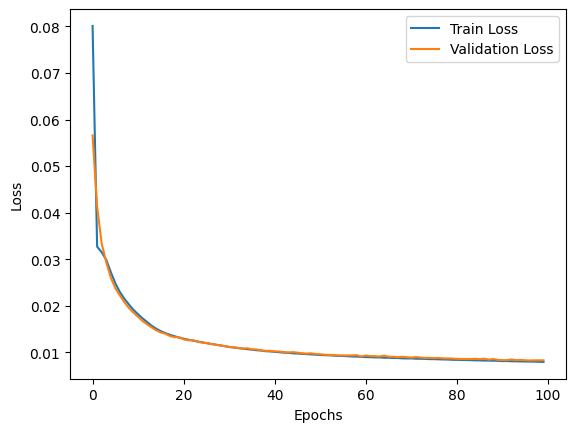

In [26]:
import matplotlib.pyplot as plt

history = autoencoder.fit(X_train, X_train,  
                          epochs=100,
                          batch_size=32,
                          validation_split=0.2)  # Set validation split (e.g., 20%)

# Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


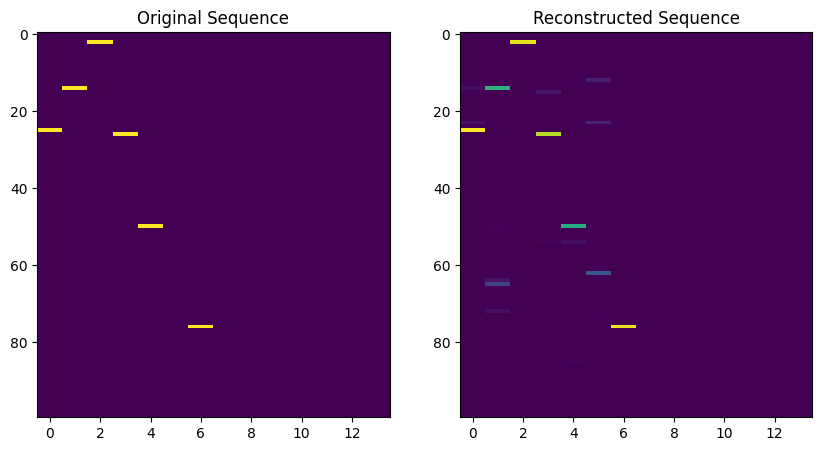

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Get reconstructed output
decoded_output = autoencoder.predict(X_train)

# Select a sample sequence
index = np.random.randint(0, len(X_train))
original = X_train[index]
reconstructed = decoded_output[index]

# Plot the original and reconstructed sequence
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original.T, aspect='auto', cmap='viridis')
plt.title("Original Sequence")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed.T, aspect='auto', cmap='viridis')
plt.title("Reconstructed Sequence")
plt.show()

In [28]:
# Extract the encoder model
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("latent").output)
# Get the encoded (compressed) features
encoded_features = encoder.predict(X_train)
print(encoded_features.shape)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(18000, 7, 64)


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pandas as pd

# ... (your data loading and preprocessing code as before, resulting in X_train, X_test, y_train, y_test)

# 1. LSTM Model with Attention (same as before)
model_input = keras.Input(shape=(7, 64))  # Timesteps, Features

# LSTM layers
lstm1 = layers.LSTM(64, return_sequences=True)(model_input)
dropout1 = layers.Dropout(0.2)(lstm1)
lstm2 = layers.LSTM(32, return_sequences=True)(dropout1)  # Return sequences for attention
dropout2 = layers.Dropout(0.2)(lstm2)

# Attention mechanism
attention_output = layers.Attention()([lstm2, lstm2])  # Self-attention

# Flatten the attention output
attention_flatten = layers.Flatten()(attention_output)

# Dense layers after attention
dense1 = layers.Dense(32, activation='relu')(attention_flatten)
dropout3 = layers.Dropout(0.2)(dense1)

output = layers.Dense(y_train.shape[1], activation='softmax')(dropout3)  # Output shape matches labels

model = keras.Model(inputs=model_input, outputs=output)
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [30]:
#Train LSTM on extracted features
print(encoded_features.shape)
model.fit(encoded_features, y_train, epochs=100, batch_size=32, validation_split = 0.2)

(18000, 7, 64)
Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7054 - loss: 0.7707 - val_accuracy: 0.8967 - val_loss: 0.3039
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9067 - loss: 0.2770 - val_accuracy: 0.9278 - val_loss: 0.2022
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9292 - loss: 0.2112 - val_accuracy: 0.9367 - val_loss: 0.1843
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9401 - loss: 0.1770 - val_accuracy: 0.9436 - val_loss: 0.1646
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9521 - loss: 0.1430 - val_accuracy: 0.9356 - val_loss: 0.1838
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9570 - loss: 0.1303 - val_accuracy: 0.9514 - val_loss: 0.1302
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9610 - loss: 0.1154 - val_accuracy: 0.9597 - val_loss: 0.1339
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9673 - loss: 0.

In [31]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# import ast  # Import the ast module

# # 1. Data Preprocessing

# # Load data from CSV
# data = pd.read_csv('/kaggle/input/capsnet-lstm-dataset/testing_queries.csv')

# # Define all possible elements (vocabulary)
# vocabulary = [f"{prefix}{num:02}" for prefix in ['R', 'W'] for num in range(50)]
# num_elements = len(vocabulary)

# # Create dictionaries for mapping
# word_to_index = {word: i for i, word in enumerate(vocabulary)}
# index_to_word = {i: word for i, word in enumerate(vocabulary)}

# # Correctly encode the sequences (handling string representation of lists)
# def encode_sequence(sequence_str):
#     try:
#         sequence_list = ast.literal_eval(sequence_str)  # Safely parse the string as a list
#         return [word_to_index[element] for element in sequence_list]
#     except (SyntaxError, ValueError):  # Handle potential errors in parsing
#         return []  # Or some other default value/handling for invalid sequences

# data['encoded_sequence'] = data['query'].apply(encode_sequence)

# # Remove rows with empty encoded sequences (if any)
# data = data[data['encoded_sequence'].apply(len) > 0]

# # Find the maximum sequence length (after removing potentially invalid sequences)
# max_length = max(data['encoded_sequence'].apply(len))

# # Pad the sequences
# padded_sequences = pad_sequences(data['encoded_sequence'], maxlen=max_length, padding='post', value=0)

# # One-hot encode the sequences
# one_hot_sequences = np.zeros((len(padded_sequences), max_length, num_elements))
# for i, sequence in enumerate(padded_sequences):
#     for j, element in enumerate(sequence):
#         if element != 0:  # Ignore padding
#             one_hot_sequences[i, j, element] = 1

# # Prepare the labels (assuming roles are integers 0-4)
# roles = data['role'].values
# num_roles = 5  # Get the number of unique roles
# one_hot_labels = to_categorical(roles, num_classes=num_roles)

# # Example usage (print shapes to verify)
# print("Padded Sequences shape:", padded_sequences.shape)
# print("One-Hot Sequences shape:", one_hot_sequences.shape)
# print("One-Hot Labels shape:", one_hot_labels.shape)
# from sklearn.utils import shuffle
# X_test, y_test = shuffle(one_hot_sequences, one_hot_labels, random_state=None)
# # print(X_train.shape)

In [32]:
# #/kaggle/input/capsnet-lstm-dataset/train_data.csv

# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# import pandas as pd

# # 3. Load and Preprocess the NEW test data (important: same preprocessing as training)
# new_data_df = pd.read_csv("/kaggle/working/test_data_shuffled.csv")  # Replace with your file name

# all_elements = [f'R{i:02d}' for i in range(50)] + [f'W{i:02d}' for i in range(50)]
# element_to_index = {element: idx for idx, element in enumerate(all_elements)}

# def preprocess_sequence(sequence_string):
#     tokens = sequence_string.strip("[]").split(",")  # Remove brackets and split
#     tokens = [token.strip('"') for token in tokens] # Remove quotes
#     index_sequence = [element_to_index.get(element) for element in tokens if element in element_to_index] # Handle unknown tokens
#     return index_sequence

# new_sequences = new_data_df['query'].tolist()
# new_index_sequences = [preprocess_sequence(seq) for seq in new_sequences]

# max_len = 14  # Make sure this is the same as your training data's max_len
# new_padded_sequences = np.array([seq + [-1] * (max_len - len(seq)) for seq in new_index_sequences])

# # One-hot encode (without padding token in the matrix)
# one_hot_matrix = np.eye(len(all_elements))  # No +1 for padding!
# new_one_hot_sequences = np.array([[one_hot_matrix[idx] if idx != -1 and idx is not None else np.zeros(len(all_elements)) for idx in seq] for seq in new_padded_sequences])

# new_roles = new_data_df['role'].tolist()
# num_classes = len(np.unique(new_roles)) # Get the number of classes dynamically
# new_one_hot_roles = to_categorical(new_roles, num_classes=num_classes)

# # 4. Prediction on NEW data
# # 1. Slice the Data (Take only the first 4000 entries)
# num_entries_to_take = 0
# new_one_hot_sequences = new_one_hot_sequences[num_entries_to_take:]
# new_one_hot_roles = new_one_hot_roles[num_entries_to_take:]

# from sklearn.utils import shuffle
# X_test, y_test = shuffle(new_one_hot_sequences, new_one_hot_roles, random_state=42)
# print(X_test.shape)

In [33]:
# encoded_features_test = encoder.predict(X_test)
# print(encoded_features_test.shape)

In [34]:
# import os
# import numpy as np
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns


# OUTPUT_DIR = "/kaggle/working/"
# predictions = model.predict(encoded_features_test)
# predicted_labels = np.argmax(predictions, axis=1)
# actual_labels = np.argmax(y_test, axis=1)
# correct_indices = np.where(predicted_labels == actual_labels)[0]
# output_df = data.iloc[correct_indices].copy()
# output_path = os.path.join(OUTPUT_DIR, "correct_predictions.csv")
# output_df.to_csv(output_path, index=False)
# precision = precision_score(actual_labels, predicted_labels, average='weighted')
# recall = recall_score(actual_labels, predicted_labels, average='weighted')
# f1 = f1_score(actual_labels, predicted_labels, average='weighted')
# accuracy = len(output_df)/len(encoded_features_test)
# print(f"\nEvaluation Metrics:")
# print(f"Accuracy: {accuracy:.2%}")
# print(f"Precision: {precision:.2%}")
# print(f"Recall: {recall:.2%}")
# print(f"F1-Score: {f1:.2%}")
# print(f"\nSaved {len(output_df)}/{len(encoded_features_test)} correctly predicted queries to {output_path}")

# #confusion matrix 
# def plot_confusion_matrix(y_true, y_pred, classes):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                 xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.png'))
#     plt.show()

# # Get class names (assuming you have them)
# class_names = np.unique(data['role'])  # Update if your label column has different name
# plot_confusion_matrix(actual_labels, predicted_labels, class_names)

# # Optional: Save full metrics report
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
#     'Value': [accuracy, precision, recall, f1]
# })
# metrics_df.to_csv(os.path.join(OUTPUT_DIR, 'evaluation_metrics.csv'), index=False)

# # List files in output directory
# print("\nFiles in output directory:")
# print(os.listdir(OUTPUT_DIR))

In [35]:
# import os
# import numpy as np
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns


# OUTPUT_DIR = "/kaggle/working/"
# predictions = model.predict(encoded_features_test)
# predicted_labels = np.argmax(predictions, axis=1)
# actual_labels = np.argmax(y_test, axis=1)
# correct_indices = np.where(predicted_labels == actual_labels)[0]
# output_df = new_data_df.iloc[correct_indices].copy()
# output_path = os.path.join(OUTPUT_DIR, "correct_predictions.csv")
# output_df.to_csv(output_path, index=False)
# precision = precision_score(actual_labels, predicted_labels, average='weighted')
# recall = recall_score(actual_labels, predicted_labels, average='weighted')
# f1 = f1_score(actual_labels, predicted_labels, average='weighted')
# accuracy = len(output_df)/len(encoded_features_test)
# print(f"\nEvaluation Metrics:")
# print(f"Accuracy: {accuracy:.2%}")
# print(f"Precision: {precision:.2%}")
# print(f"Recall: {recall:.2%}")
# print(f"F1-Score: {f1:.2%}")
# print(f"\nSaved {len(output_df)}/{len(encoded_features_test)} correctly predicted queries to {output_path}")

# #confusion matrix 
# def plot_confusion_matrix(y_true, y_pred, classes):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                 xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.savefig(os.path.join(OUTPUT_DIR, 'confusion_matrix.png'))
#     plt.show()

# # Get class names (assuming you have them)
# class_names = np.unique(new_data_df['role'])  # Update if your label column has different name
# plot_confusion_matrix(actual_labels, predicted_labels, class_names)

# # Optional: Save full metrics report
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
#     'Value': [accuracy, precision, recall, f1]
# })
# metrics_df.to_csv(os.path.join(OUTPUT_DIR, 'evaluation_metrics.csv'), index=False)

# # List files in output directory
# print("\nFiles in output directory:")
# print(os.listdir(OUTPUT_DIR))

In [36]:
# loss, accuracy = model.evaluate(encoded_features_test, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")

In [37]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import ast

# # Load vocabulary and mappings (same as training)
# vocabulary = [f"{prefix}{num:02}" for prefix in ['R', 'W'] for num in range(50)]
# word_to_index = {word: i for i, word in enumerate(vocabulary)}

# # Function to preprocess a single query (same as training)
# def preprocess_query(query_str):
#     try:
#         sequence_list = ast.literal_eval(query_str)  # Parse string to list
#         encoded_seq = [word_to_index[element] for element in sequence_list]
#     except (SyntaxError, ValueError, KeyError):
#         return None  # Handle invalid queries
        
#     padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', value=0)
    
#     # One-hot encode (same as training)
#     one_hot_seq = np.zeros((1, max_length, len(vocabulary)))
#     for j, element in enumerate(padded_seq[0]):
#         if element != 0:
#             one_hot_seq[0, j, element] = 1
#     return one_hot_seq

# # Function to predict and validate
# def predict_and_validate(query, true_role, model):
#     # Preprocess query
#     X = preprocess_query(query)
#     if X is None:
#         print("Invalid query format!")
#         return
    
#     # Predict
#     encoded_features_test = encoder.predict(X)
#     pred_prob = model.predict(encoded_features_test)
#     pred_role = np.argmax(pred_prob, axis=1)[0]
    
#     # Check if prediction matches true_role
#     is_correct = (pred_role == true_role)
#     print(f"Query: {query}")
#     print(f"Predicted Role: {pred_role} | True Role: {true_role}")
#     print(f"Result: {'✅ True' if is_correct else '❌ False'}")
#     return is_correct

# # Example Usage
# query = "['R48', 'R46', 'R45', 'R31', 'R31', 'R26', 'W20', 'W24', 'W25', 'R42', 'R46']"  # Example input (must be string representation of a list)
# true_role = 3  # Example role (integer 0-4)
# predict_and_validate(query, true_role, model)  # Replace `model` with your trained model

In [38]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import ast

# # Load vocabulary and mappings
# vocabulary = [f"{prefix}{num:02}" for prefix in ['R', 'W'] for num in range(50)]
# word_to_index = {word: i for i, word in enumerate(vocabulary)}
# max_length = max_length

# # Function to preprocess a single query
# def preprocess_query(query_str):
#     try:
#         sequence_list = ast.literal_eval(query_str)  # Parse string to list
#         encoded_seq = [word_to_index[element] for element in sequence_list if element in word_to_index]
#     except (SyntaxError, ValueError, KeyError):
#         return None  # Skip invalid queries
        
#     padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', value=0)
    
#     # One-hot encode
#     one_hot_seq = np.zeros((1, max_length, len(vocabulary)))
#     for j, element in enumerate(padded_seq[0]):
#         if element != 0:
#             one_hot_seq[0, j, element] = 1
#     return one_hot_seq

# # Function to process the entire input file
# def process_input_file(input_path, output_path, encoder, model):
#     # Read input file
#     df = pd.read_csv(input_path)  # Adjust if file format differs (e.g., Excel, JSON)
    
#     correct_predictions = []
    
#     for _, row in df.iterrows():
#         query = row['query']  # Replace with your query column name
#         true_role = row['role']     # Replace with your label column name
        
#         # Preprocess and predict
#         X = preprocess_query(query)
#         if X is None:
#             continue  # Skip invalid queries
        
#         encoded_features = encoder.predict(X , verbose = 0)
#         pred_prob = model.predict(encoded_features ,  verbose = 0)
#         pred_role = np.argmax(pred_prob, axis=1)[0]
        
#         # Store if prediction matches true role
#         if pred_role == true_role:
#             correct_predictions.append(row.to_dict())
    
#     # Save correct predictions to output file
#     if correct_predictions:
#         pd.DataFrame(correct_predictions).to_csv(output_path, index=False)
#         print(f"Saved {len(correct_predictions)} correct predictions to {output_path}")
#     else:
#         print("No correct predictions found.")


# input_path = "/kaggle/input/capsnet-lstm-dataset/testing_queries.csv"
# output_path = "/kaggle/working/correct_predictions_per.csv"
# process_input_file(input_path, output_path, encoder, model)

In [39]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import ast

# # Load vocabulary and mappings
# vocabulary = [f"{prefix}{num:02}" for prefix in ['R', 'W'] for num in range(50)]
# word_to_index = {word: i for i, word in enumerate(vocabulary)}
# max_length = max_length

# def preprocess_query(query_str):
#     try:
#         sequence_list = ast.literal_eval(query_str)  # Parse string to list
#         encoded_seq = [word_to_index[element] for element in sequence_list if element in word_to_index]
#     except (SyntaxError, ValueError, KeyError):
#         return None  # Skip invalid queries
        
#     padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', value=0)
    
#     # One-hot encode
#     one_hot_seq = np.zeros((1, max_length, len(vocabulary)))
#     for j, element in enumerate(padded_seq[0]):
#         if element != 0:
#             one_hot_seq[0, j, element] = 1
#     return one_hot_seq

# def process_input_file(input_path, output_path, encoder, model, max_length=50):
    
#     # Read input file
#     df = pd.read_csv(input_path)
    
#     # Verify required columns exist
#     if 'query' not in df.columns or 'role' not in df.columns:
#         raise ValueError("Input CSV must contain 'query' and 'role' columns")
    
#     # Initialize list to store all rows with predictions
#     results = []
#     correct_count = 0
    
#     for _, row in df.iterrows():
#         query = row['query']
#         true_role = row['role']
        
#         # Preprocess and predict
#         X = preprocess_query(query)
#         if X is None:
#             # For invalid queries, mark as incorrect prediction (1)
#             results.append({**row.to_dict(), 'predicted_class': 1})
#             continue
        
#         encoded_features = encoder.predict(X, verbose=0)
#         pred_prob = model.predict(encoded_features, verbose=0)
#         pred_role = np.argmax(pred_prob, axis=1)[0]
        
#         # Determine if prediction was correct (0) or incorrect (1)
#         prediction_status = 0 if pred_role == true_role else 1
#         if prediction_status == 0:
#             correct_count += 1
        
#         # Add the original row data with the new predicted_class column
#         results.append({**row.to_dict(), 'predicted_class': prediction_status})
    
#     # Convert results to DataFrame
#     result_df = pd.DataFrame(results)
    
#     # Save to output file
#     result_df.to_csv(output_path, index=False)
    
#     # Calculate and print accuracy
#     total_rows = len(result_df)
#     accuracy = (correct_count / total_rows) * 100 if total_rows > 0 else 0
#     print(f"Processed {total_rows} rows. Accuracy: {accuracy:.2f}%")
#     print(f"Saved results with predictions to {output_path}")

# input_path = "/kaggle/input/capsnet-lstm-dataset/testing_queries.csv"
# output_path = "/kaggle/working/correct_predictions_per.csv"
# process_input_file(input_path, output_path, encoder, model)

In [40]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import ast
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load vocabulary and mappings
vocabulary = [f"{prefix}{num:02}" for prefix in ['R', 'W'] for num in range(50)]
word_to_index = {word: i for i, word in enumerate(vocabulary)}
max_length = max_length  # Make sure this is defined in your code

def preprocess_query(query_str):
    try:
        sequence_list = ast.literal_eval(query_str)
        encoded_seq = [word_to_index[element] for element in sequence_list if element in word_to_index]
    except (SyntaxError, ValueError, KeyError):
        return None
        
    padded_seq = pad_sequences([encoded_seq], maxlen=max_length, padding='post', value=0)
    
    one_hot_seq = np.zeros((1, max_length, len(vocabulary)))
    for j, element in enumerate(padded_seq[0]):
        if element != 0:
            one_hot_seq[0, j, element] = 1
    return one_hot_seq

def process_and_analyze(input_path, output_path, encoder, model):
    # --- Processing Phase ---
    df = pd.read_csv(input_path)
    
    if 'query' not in df.columns or 'role' not in df.columns:
        raise ValueError("Input CSV must contain 'query' and 'role' columns")
    
    results = []

    
    for _, row in df.iterrows():
        query = row['query']
        true_role = row['role']
        
        X = preprocess_query(query)
        if X is None:
            continue
        
        encoded_features = encoder.predict(X, verbose=0)
        pred_prob = model.predict(encoded_features, verbose=0)
        pred_role = np.argmax(pred_prob, axis=1)[0]

        prediction_status = 0
        
        if pred_role == true_role:
            prediction_status = 0 
        else:
            if true_role == 0 or true_role == 2 : 
                prediction_status = 1
            else:
                prediction_status = 0
        results.append({**row.to_dict(), 'predicted_class': prediction_status})
    
    result_df = pd.DataFrame(results)
    result_df.to_csv(output_path, index=False)
    

# Example usage
input_path = "/kaggle/input/temp-data/testing_queries_for_22.5k.csv"
output_path = 'correct_predictions_per_for_22.5k.csv'

result_df, role_counts = process_and_analyze(input_path, output_path, encoder, model)

TypeError: cannot unpack non-iterable NoneType object